# Deep Learning with TensorFlow and Keras

Keras is a high-level API of the TensorFlow, which provides approachable and highly-productive interface for solving machine learning (ML) problems. It covers the whole ML workflow from data processing to hyperparameter tuning to deployment and enables fast experimentation.

### 1) Set Up TensorFlow and Keras

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.__version__)

2.9.0


### 2) Simple (1 layer - 1 neuron) Neural Network

The simplest possible neural network is one with only a single layer with one neuron and has the input shape of a single value as shown in the figure below:

<img src="../image/nn_1_1.png" alt="one layer one neuron neural network" width="600">

Let's assume we are given two sets of data:
```python
x = [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0]
y = [-4.0, -1.0, 2.0, 5.0, 8.0, 11.0]
```
and we want to find the rule behind them which is:
```python
y = 3x + 2
```
#### a) Define the Model and Compile the Neural Network

Keras [Sequential](https://keras.io/api/models/sequential/) class allows to group a linear sequence of layers into a model. The simplest neural network with a single layer can be built with a single [dense](https://keras.io/api/layers/core_layers/dense/) layer, which is the densely-connected neural network layer.


In [18]:
# build a simple sequential model with a dense layer
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

To compile the neural network, a __loss__ function and an __optimizer__ are needed. During the training process, the __loss__ function calculates the loss by comparing the actual values to the predicted values. On the other hand, the __optimizer__ updates the weights of the neural network for a new prediction to minimize the loss. They work in turns for the selected number of __epochs__. Keras API provides a list of available [loss](https://keras.io/api/losses/) functions and [optimizer](https://keras.io/api/optimizers/)s.

In [19]:
# compile the model with sgd optimizer and MSE loss function
model.compile(optimizer='sgd', loss='mean_squared_error')

#### b) Train the Neural Network

To train the model, labeled data is prepared in pairs as input and output values. The values, which are float number in this case, are prepared as numpy arrays.

In [20]:
# inputs and outputs for model training
x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0, 3.0], dtype=float)
y = np.array([-4.0, -1.0, 2.0, 5.0, 8.0, 11.0], dtype=float)

The ```.fit()``` function is called over the model to train the neural network. By going through the training turns, the model learns the relationship between input and output values. The training loops depends on the number of epochs, which is set by the __epoch__ parameter.

In [21]:
# train the model
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 373ms/step - loss: 41.6561
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 36.5087
Epoch 3/300
1/1 [==============================] - 0s 11ms/step - loss: 32.0090
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 28.0752
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 24.6357
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 21.6280
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 18.9975
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 16.6966
Epoch 9/300
1/1 [==============================] - 0s 11ms/step - loss: 14.6835
Epoch 10/300
1/1 [==============================] - 0s 8ms/step - loss: 12.9220
Epoch 11/300
1/1 [==============================] - 0s 9ms/step - loss: 11.3802
Epoch 12/300
1/1 [==============================] - 0s 8ms/step - loss: 10.0305
Epoch 13/300
1/1 [=====================

When the model is trained with the labeled data, ```.predict()``` method is used to make new predictions for unlabeled data.

In [22]:
# make a prediction
print(model.predict([20.0]))

1/1 [==============================] - 0s 132ms/step
[[62.019344]]


Using the formula below:
```python
y = 3(20) + 2
```
The expected answer would be 62 for the input value 20. Neural networks work with probabilities and the data size as well as other criteria (number of epochs, optimizer, loss function) in this example resulted in model prediction close to true value, but not the exact value. With neural networks, not certainties but probabilities should be considered for prediction and particularly classification tasks.

### 3) Dense Neural Network

A dense neural network (DNN), also known as a fully connected neural network, is a machine learning model in which every neuron in one layer is fully connected to every neuron in the previous layer. DNNs are widely used for classification, regression, and other tasks that require a complex, non-linear mapping between inputs and outputs. They work well with numerical or structural data.

#### a) Load and Prepare the Data

DNNs can be used to perform some computer vision tasks such as classification. The __Fashion MNIST__ dataset, which is available in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API, is a collection of grayscale 28x28 pixel clothing images which is suitable for a basic classification task. The ```.load_data()``` method allows to load the data from the API and returns two tuples with data and labels. The labels are returned as a number list which maps as below:

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| T-shirt/top | Trouser | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle boot |

While working with visual data and training a neural network for image processing, it is usually better to normalize the pixel values by scaling to (0, 1). EXPLAIN MORE!

Label: 5


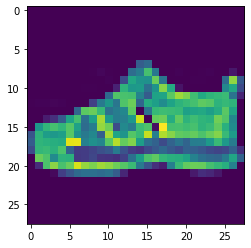

In [43]:
# load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

# load and split the training and test sets of the Fashion MNIST dataset
(train_img, train_lab), (test_img, test_lab) = fmnist.load_data()

# set number of characters per row when printing
#np.set_printoptions(linewidth=320)

# pick a random image from the dataset
i = np.random.randint(train_lab.shape[0], size=1)[0]

# print image and label of the randomly selected sample
print("Label:", train_lab[i])
#print("Image as NumPy array: \n", train_img[i])

# visualize the image
plt.imshow(train_img[i])

# normalize the pixel values from (0, 255) to (0, 1)
train_img  = train_img / 255.0
test_img = test_img / 255.0

#### b) Define the Model and Compile the Neural Network

Keras [Dense](https://keras.io/api/layers/core_layers/dense/) layers are used in a sequential order to create DNNs. The initial step for the visual data in a DNN is to flatten the matrix of normalized pixel values into a 1-dimensional array, which can be done by the [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) layer. It flattens the input without changing the batch size. The first layer in the neural network should be the same shape as the data (to avoid an error about the shape of the data), and it is more feasible to flatten the matrix rather than using the matrix shape here. The fully connected dense layers can be added by specifying the dimensionality of the output space, and the activation function to use. The __activation__ parameter is used to specify the activation function. If not specified, no activation is applied (ie. "linear" activation: a(x) = x). However, for neural networks to learn and represent complex relationships between inputs and outputs, activation functions are essential as they introduce non-linearity into the model. Some of them are [softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax) (used to normalize a vector of real numbers to a probability distribution for classification tasks), [sigmoid](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid) (similar to softmax as it outputs in the range 0-1), [relu](https://www.tensorflow.org/api_docs/python/tf/nn/relu) (used to map all negative values to 0 and all positive values to the same value, introducing non-linearity to the network and helping to prevent vanishing gradients) etc. More parameters to specify the layer (i.e bias, regularization) can be found in the Keras [Dense](https://keras.io/api/layers/core_layers/dense/) layer page.

In [ ]:
# build the classification model (try first dense layer with 1024 neurons)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

As a rule of thumb, the number of neurons in the last layer should match the number of classes the data is being classified into. Otherwise, the model returns an error if it finds an unexpected value. Hence, the last dense layer has ```10``` neurons, mapping the input to a list of 10 probabilities for 10 classes. On the other hand, the number of neurons in the first dense layer is set intuitionally. It can be changed to any other number if it will provide better results. However, increasing the number of neurons will slow down the training process and may not always improve the accuracy!

The neural network is compiled with ```.compile()``` call by spesifying a __loss__ function and an __optimizer__ as explained before. Later, the model is trained with the data by calling ```.fit()``` function to fit the training data to the training labels. The __metrics__ parameter is used to track preferred metrics during the training.

In [45]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_img, train_lab, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5022 - accuracy: 0.8225
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3781 - accuracy: 0.8638
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3383 - accuracy: 0.8773
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3126 - accuracy: 0.8858
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2942 - accuracy: 0.8910
Epoch 6/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2770 - accuracy: 0.8970
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2653 - accuracy: 0.9016
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2567 - accuracy: 0.9035
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2437 - accuracy: 0.9090
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - l

The final accuracy of the model can be found on the last epoch. The accuracy on the last epoch above is __0.93__, which means the model is %93 accurate on the training set. However, it is also crucial to confirm how the model performs on the test set, which can be checked by the ```.evaluate()``` call. The accuracy of the model on the unseen data is __0.88__, which means it is 88% accurate on the unseen data. As expected, the model performs less accurate on the test set.

In [46]:
# evaluate the model on the unseen test data
model.evaluate(test_img, test_lab)

313/313 [==============================] - 5s 6ms/step - loss: 0.3649 - accuracy: 0.8870


[0.36485448479652405, 0.8870000243186951]

With the softmax activation on the last layer, the model predicts the probabilities of the input image being in any of the 10 classes defined before. Hence for each prediction, the model returns a 10 item list with 10 probabilities. The highest probability is used as the prediction of the model for the input image. An example of a test data is shown below:

313/313 [==============================] - 1s 3ms/step
Probabilities of each class for the item (39):
 [1.9281529e-13 4.3010161e-19 4.9714338e-16 1.1918483e-15 4.4886968e-23 1.2032177e-07 1.1423350e-15 2.7894768e-05 8.2871857e-15 9.9997199e-01]
Predicted class of the item (39): 9
Actual class of the item (39): 9


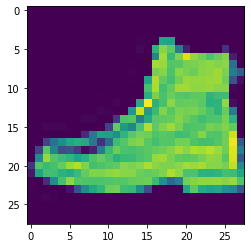

In [80]:
# predict all items in the test set
classes = model.predict(test_img)

# pick an item
i = 39

# print item classification probabilities
print(f"Probabilities of each class for the item ({i}):\n", classes[i])
print(f"Predicted class of the item ({i}):", np.argmax(classes[i]))
print(f"Actual class of the item ({i}):", test_lab[i])

# visualize the image
plt.imshow(test_img[i])